In [1]:
import numpy as np
import ToyCell as Cell
import ToyCellAuto as ca
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from toy_utils import get_plot_bounds, create_burn_ext

In [2]:
value = 50
fireID = 'TOY' + str(value)
res = 30
num_days = 40
num_hours = num_days*24
CA = ca.CellAuto(path_to_data='data', 
                 fireID = fireID,
                 out_dir = '',
                 num_plots = 20,
                 has_barriers = False,
                 max_hours = num_hours, 
                 res = res,
                 burn_out_time = num_hours
                )

In [9]:
CA.burning_cells

{(100,100)}

In [10]:
for cell in CA.burning_cells:
    print(cell)
    print(cell.IGN_LOC)
    print(cell.START_TIME)
    print(np.round(cell.ros,2))
    print()

(100,100)
[0 0]
0
[3.75 3.75 3.75 3.75 3.75 3.75 3.75 3.75]



In [3]:
CA.run()

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 141.0 142.0 143.0 144.0 145.0 146.0 147.0 148.0 149.0 150.0 151.0 152.0 153.0 154.0 155.0 156.0 157.0 158.0 159.0 160.0 161.0 162.0 163.0 164.0 165.0 166.0 167.0 168.0 169.0 170.0 171.0 172.0 173.0 174.0 175.0 176.0 177.0 178.0 179.0 180.0 181.0 182.0 183.0 184.0 185.

IndexError: index 480 is out of bounds for axis 0 with size 480

In [3]:
aos = value*10000/CA.RESOLUTION**2
aos

100.0

In [4]:
CA.fire_growth[0,0,0]

np.float32(0.81)

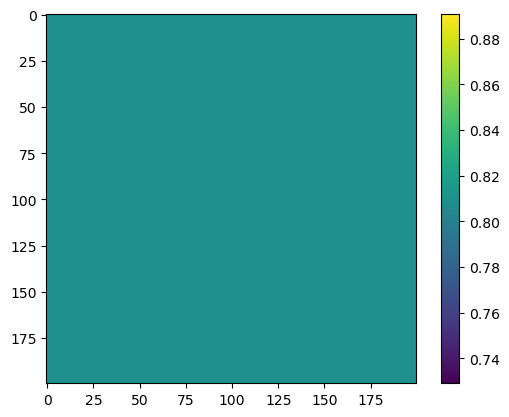

In [5]:
plt.imshow(CA.fire_growth[0])
plt.colorbar()
plt.show()

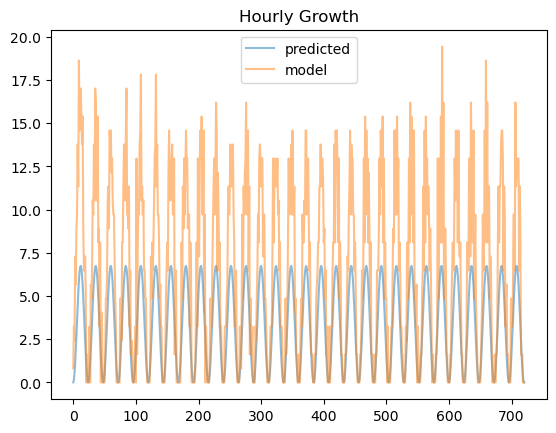

In [7]:
hours = np.arange(CA.MAX_HOURS+1)
pred_growth = np.zeros(len(hours))
model_growth = np.zeros(len(hours))
for hr in hours:
    pred_growth[hr] = np.nanmean(CA.hourly_growth[hr])*CA.RESOLUTION**2/10000
    model_mask = np.logical_and(CA.arrival_map>=hr, CA.arrival_map<(hr+1))
    model_growth[hr] = np.nansum(model_mask)*CA.RESOLUTION**2/10000

plt.plot(hours, pred_growth, label='predicted', alpha=0.5)
plt.plot(hours, model_growth, label='model', alpha=0.5)

plt.title('Hourly Growth')
plt.legend()
plt.show()

In [ ]:
days = np.arange(0,CA.TOTAL_DAYS)
daily_pred_growth = np.zeros(len(days))
daily_model_growth = np.zeros(len(days))
for day in days:
    daily_model_growth[day] = np.nansum(model_growth[day*24:(day+1)*24])
    daily_pred_growth[day] = np.nansum(pred_growth[day*24:(day+1)*24]) 

plt.plot(days, daily_pred_growth, label='predicted')
plt.plot(days, daily_model_growth, label='model')

plt.title(f'Resolution: {res}m  AOS: {value} hectares/day')
plt.ylabel('Daily Growth (hectares)')
plt.legend()
plt.show()

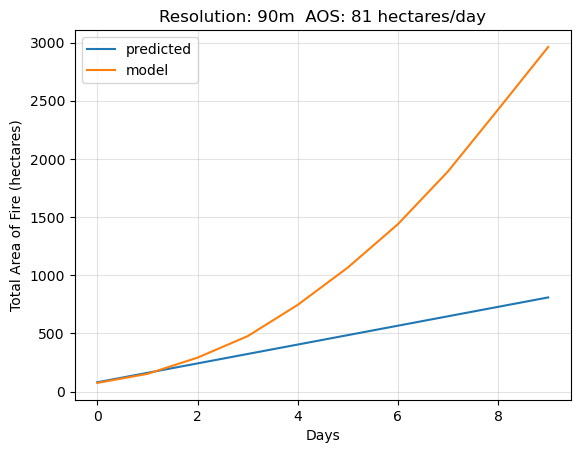

In [10]:
cum_pred = np.nancumsum(daily_pred_growth)
cum_model = np.nancumsum(daily_model_growth)
plt.plot(days,cum_pred,label='predicted')
plt.plot(days, cum_model,label='model')


plt.title(f'Resolution: {res}m  AOS: {value} hectares/day')
plt.xlabel('Days')
plt.ylabel('Total Area of Fire (hectares)')
plt.legend()
plt.grid(True,alpha = 0.35)
plt.show()

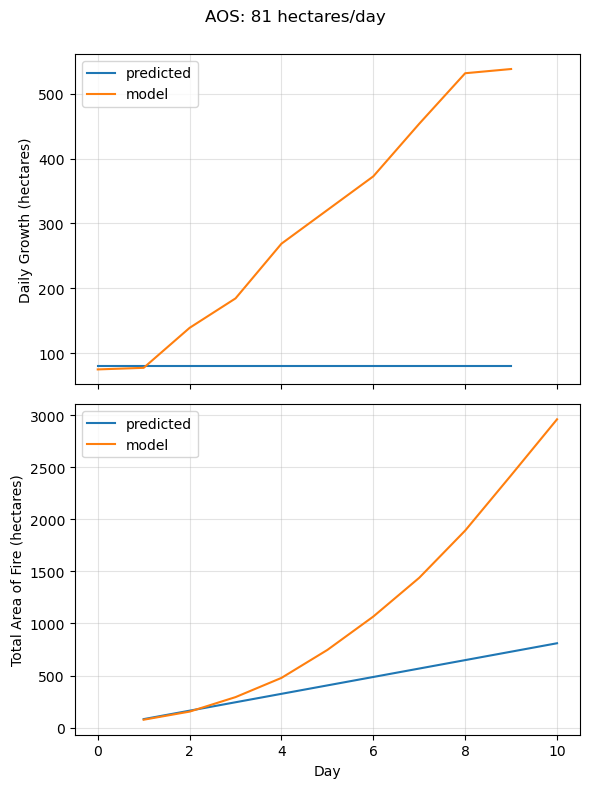

In [11]:
hours = np.arange(CA.MAX_HOURS)
days = np.arange(0, CA.TOTAL_DAYS)

pred_growth = np.zeros(len(hours))
model_growth = np.zeros(len(hours))
for hr in hours:
    pred_growth[hr] = np.nanmean(CA.hourly_growth[hr])*CA.RESOLUTION**2/10000
    model_mask = np.logical_and(CA.arrival_map>=hr, CA.arrival_map<(hr+1))
    model_growth[hr] = np.nansum(model_mask)*CA.RESOLUTION**2/10000

daily_pred_growth = np.zeros(len(days))
daily_model_growth = np.zeros(len(days))
for day in days:
    daily_model_growth[day] = np.nansum(model_growth[day*24:(day+1)*24])
    daily_pred_growth[day] = np.nansum(pred_growth[day*24:(day+1)*24]) 

cum_pred = np.nancumsum(daily_pred_growth)
cum_model = np.nancumsum(daily_model_growth)


fig, axes = plt.subplots(2, 1, figsize=(6,8), sharex='col')

# --- Plot 1: Daily Growth ---
ax = axes[0]
ax.plot(days, daily_pred_growth, label='predicted')
ax.plot(days, daily_model_growth, label='model')
ax.set_ylabel('Daily Growth (hectares)')
ax.legend()
ax.grid(True,alpha = 0.35)

# --- Plot 2: Cumulative Growth ---
ax = axes[1]
ax.plot(days+1,cum_pred,label='predicted')
ax.plot(days+1, cum_model,label='model')
ax.set_ylabel('Total Area of Fire (hectares)')
ax.legend()
ax.grid(True,alpha = 0.35)
ax.set_xlabel('Day')

fig.suptitle(f'AOS: {value} hectares/day')
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

In [10]:
file_path = CA.OUT_DIR + f'/pred_vs_model_growth.png'

hours = np.arange(CA.MAX_HOURS)
days = np.arange(0, CA.TOTAL_DAYS)

pred_growth = np.zeros(len(hours))
model_growth = np.zeros(len(hours))
for hr in hours:
    pred_growth[hr] = np.nanmean(CA.hourly_growth[hr])*CA.RESOLUTION**2/10000
    model_mask = np.logical_and(CA.arrival_map>=hr, CA.arrival_map<(hr+1))
    model_growth[hr] = np.nansum(model_mask)*CA.RESOLUTION**2/10000

daily_pred_growth = np.zeros(len(days))
daily_model_growth = np.zeros(len(days))
for day in days:
    daily_model_growth[day] = np.nansum(model_growth[day*24:(day+1)*24])
    daily_pred_growth[day] = np.nansum(pred_growth[day*24:(day+1)*24]) 

cum_pred = np.nancumsum(daily_pred_growth)
cum_model = np.nancumsum(daily_model_growth)


fig, axes = plt.subplots(2, 1, figsize=(6,8), sharex='col')

# --- Plot 1: Daily Growth ---
ax = axes[0]
ax.plot(days, daily_pred_growth, label='predicted')
ax.plot(days, daily_model_growth, label='model')
ax.set_ylabel('Daily Growth (hectares)')
ax.legend()
ax.grid(True,alpha = 0.35)

# --- Plot 2: Cumulative Growth ---
ax = axes[1]
ax.plot(days+1,cum_pred,label='predicted')
ax.plot(days+1, cum_model,label='model')
ax.set_ylabel('Total Area of Fire (hectares)')
ax.legend()
ax.grid(True,alpha = 0.35)
ax.set_xlabel('Day')

fig.suptitle(f'Res: {res}m  AOS: {value} hectares/day')
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.close()

In [6]:
CA.fire_growth[:,0,0]

array([5.64189577, 2.33694975, 1.79320461, 1.51174142, 1.33187092,
       1.20410335, 1.10728731, 1.0306379 , 0.96799628, 0.91555364,
       0.87081042, 0.83204887, 0.79804424, 0.76789649, 0.74092738,
       0.71661472, 0.69454911, 0.67440436, 0.65591697, 0.63887142])

In [8]:
fire_growth = CA.fire_growth.copy()
days = np.arange(1,len(fire_growth)+1)
fire_growth = fire_growth*np.sqrt(days)[:, np.newaxis, np.newaxis]
fire_growth[:,0,0]

array([ 5.        ,  7.07106781,  8.66025404, 10.        , 11.18033989,
       12.24744871, 13.22875656, 14.14213562, 15.        , 15.8113883 ,
       16.58312395, 17.32050808, 18.02775638, 18.70828693, 19.36491673,
       20.        , 20.61552813, 21.21320344, 21.79449472, 22.36067977])

In [9]:
fire_growth[1:,0,0] = fire_growth[1:,0,0] - fire_growth[:-1,0,0]
fire_growth[:,0,0]

array([5.        , 2.07106781, 1.58918623, 1.33974596, 1.18033989,
       1.06710883, 0.98130784, 0.91337907, 0.85786438, 0.8113883 ,
       0.77173565, 0.73738412, 0.7072483 , 0.68053056, 0.6566298 ,
       0.63508327, 0.61552813, 0.59767531, 0.58129128, 0.56618506])

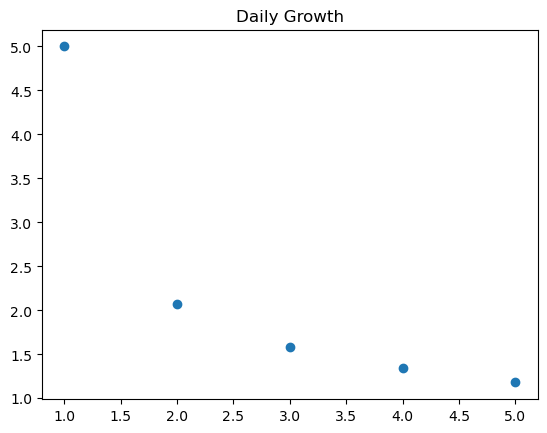

In [18]:
days = np.arange(1,CA.TOTAL_DAYS+1)
growths = np.zeros(len(days))
for d in days:
    growths[d-1] = fire_growth[d-1][0][0]

plt.plot(days, growths,label='model',linestyle='None',marker= 'o')

plt.title('Daily Growth')
plt.show()

In [10]:
def get_plot_bounds(data_arrays): 
    min_col, min_row = data_arrays[0].shape
    max_col, max_row = 0,0
    
    for data in data_arrays:
        non_nan_indices = np.argwhere(~np.isnan(data))
        row_indices = non_nan_indices[:, 0]
        col_indices = non_nan_indices[:, 1]
        temp_min_row = np.min(row_indices)
        temp_max_row = np.max(row_indices)
        temp_min_col = np.min(col_indices)
        temp_max_col = np.max(col_indices)
        min_col = min(min_col, temp_min_col)
        max_col = max(max_col, temp_max_col)
        min_row = min(min_row, temp_min_row)
        max_row = max(max_row, temp_max_row)
        
    min_col -= 2
    max_col += 2
    min_row -= 2
    max_row += 2
    return min_col, max_col, min_row, max_row

In [ ]:
hour = 1.22
arrival_masked = CA.arrival_map.copy()
arrival_masked[CA.arrival_map >= hour] = np.nan
min_col, max_col, min_row, max_row = get_plot_bounds([arrival_masked])

plt.imshow(arrival_masked)
plt.xlim(min_col, max_col)
plt.ylim(max_row, min_row)
plt.xlabel((np.sum(~np.isnan(arrival_masked))))
plt.colorbar()
plt.show()

In [13]:
hours = []
num_pix = 0
cell_growth = 4
times = np.arange(0.001,24,0.0001)
for i in range(len(times)):
    t = times[i]
    arrival_masked = CA.arrival_map.copy()
    arrival_masked[CA.arrival_map >= t] = np.nan
    pix_now = np.sum(~np.isnan(arrival_masked))
    if pix_now - num_pix >= cell_growth: 
        num_pix = cell_growth*(pix_now//cell_growth)
        hours.append(t)
len(hours)

16

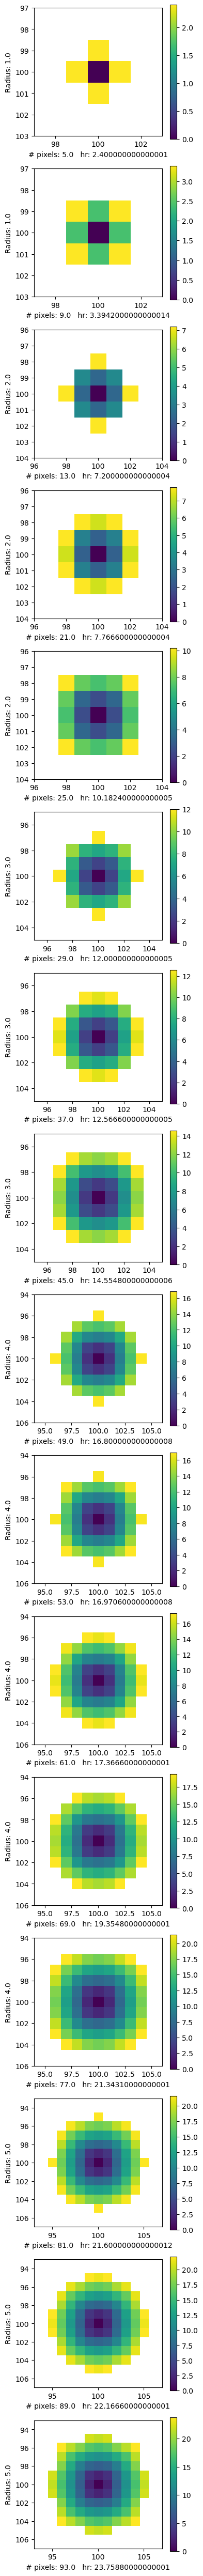

In [14]:
pix = np.zeros_like(hours)
sz = 4
num_rows = len(hours)

fig, axes = plt.subplots(num_rows, 1, figsize=(sz, num_rows*sz))

for i in range(num_rows):
    hr = hours[i]
    arrival_masked = CA.arrival_map.copy()
    arrival_masked[CA.arrival_map >= hr] = np.nan
    min_col, max_col, min_row, max_row = get_plot_bounds([arrival_masked])
    ax = axes[i]
    im = ax.imshow(arrival_masked)
    ax.set_xlim(min_col, max_col)
    ax.set_ylim(max_row, min_row)
    r = (max_col - min_col)/2 - 2
    ax.set_ylabel(f'Radius: {r}')
    pix[i] = np.sum(~np.isnan(arrival_masked))
    ax.set_xlabel(f'# pixels: {pix[i]}   hr: {hr}')
    fig.colorbar(im)